<a href="https://colab.research.google.com/github/laolucharles1/Data-Analytics-Projects/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Analysis

In [87]:
#Import Necessary libraries
import pandas as pd
import os
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt


Task #1: Merging 12 months of sales data into a single file

In [59]:
df = pd.read_csv('/content/sample_data/Sales Analysis Data/Sales_April_2019.csv') #This makes a dataframe for one month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [11]:
os. getcwd() # current directory

'/content'

In [14]:
%cd /content/sample_data/Sales Analysis Data #This changes the directory

/content/sample_data/Sales Analysis Data


In [15]:
os. getcwd() #This is the new directory

'/content/sample_data/Sales Analysis Data'

In [60]:
file_path = "/content/sample_data/Sales Analysis Data"
file_list = os.listdir(file_path) #creates a list of the files in the directory
print(file_list)

df = pd.DataFrame() # makes an empty data frame and the code below concatenates all the csv
for file in file_list:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)



df.to_csv('all_months.csv', index = False)
files.download("all_months.csv")  #This downloads csv oto local computer

['Sales_December_2019.csv', 'Sales_June_2019.csv', 'Sales_October_2019.csv', 'Sales_May_2019.csv', 'Sales_July_2019.csv', 'Sales_November_2019.csv', 'all_months.csv', 'Sales_April_2019.csv', 'Sales_March_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Read in updated dataframe

In [69]:
all_data = pd.read_csv('all_months.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Clean up the data

drop rows of Nan

In [73]:
all_data = all_data.dropna(how='all') #drops all rows that contain all NaN. If I wanted to drop rows that contained not all but at least one NaN I would type (how='any)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [74]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Convert Columns to the Correct Type

Augment data with additional columns

In [78]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

<ipython-input-78-81603091079b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-78-81603091079b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


Task 2: Add month column

In [79]:
all_data['Month'] = all_data['Order Date'].str[0:2] #the ".str" allows you to access the string characters of the column [0:2] grabs the first to characters.
all_data['Month'] = all_data['Month'].astype('int32')
all_data

<ipython-input-79-427ff4202139>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2] #the ".str" allows you to access the string characters of the column [0:2] grabs the first to characters.
<ipython-input-79-427ff4202139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
560546,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
560547,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
560546,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
560547,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


Task #3: Add a sales column

In [81]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] # Makes sales column
all_data

<ipython-input-81-7e0b8aa636dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
560546,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
560547,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


Task #4 Add a city column

In [104]:
# Let's use the .apply() method
# the apply() method allows use to use any function of your making and apply it to columns

def get_city(address):
  return address.split(',')[1] # splits the P.A column based on commas and extracts the '1' index

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x)) 
# lambda x represents the cell content in every row of purchase address (P.A)
all_data

<ipython-input-104-87c1e35dc052>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
560546,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
560547,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
560548,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


Question 1: What was the best month for sales? How much was earned that month?

In [85]:
results = all_data.groupby('Month').sum() #groups everything by month and sums the numeric values in the data frame

<ipython-input-85-254372970daa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum() #groups everything by month and sums the numeric values in the data frame


<function matplotlib.pyplot.show(close=None, block=None)>

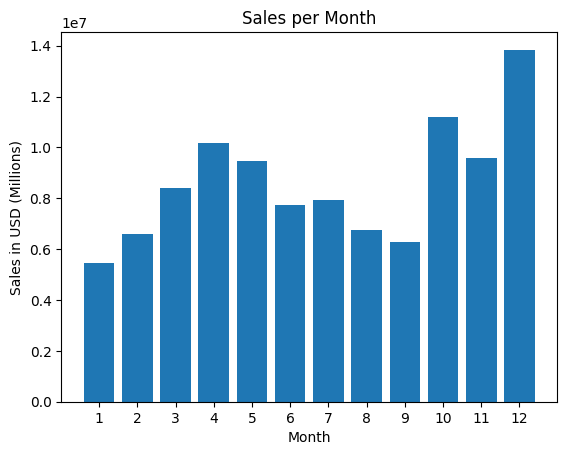

In [94]:
months = range(1,13)
plt.bar(months, results['Sales']) #bar graph set up
plt.xticks(months) #shows every month on the graph
plt.ylabel('Sales in USD (Millions)') #adds y label
plt.xlabel('Month') # ads x label
plt.title('Sales per Month') # adds title
plt.show

Question 2: Which city hand the highest number of sales?

In [111]:
cresults = all_data.groupby('City').sum()
cresults

<ipython-input-111-d44b244bd7f3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cresults = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,49806,8339724.60,314382,8386495.74
Austin TX,33459,5429620.83,209487,5458745.25
Boston MA,67584,10912229.31,423336,10984926.03
Dallas TX,50190,8257883.46,313860,8303926.20
Los Angeles CA,99867,16264305.69,624975,16357712.40
New York City NY,83796,13906112.49,527223,13992952.29
Portland ME,8250,1341567.75,51432,1349274.81
Portland OR,33909,5581674.66,211863,5612197.02
San Francisco CA,150717,24634385.22,946560,24786611.73


Text(0.5, 1.0, 'Sales by City')

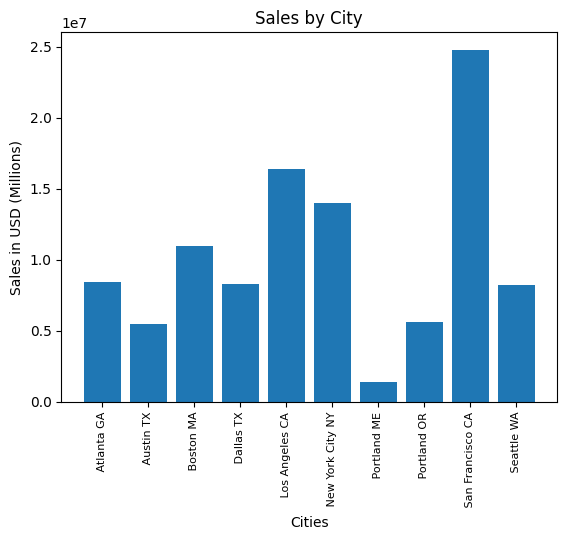

In [122]:
cities = [city for city, df in all_data.groupby('City')] # gives us the cities *** in the same order as cresults*** important for accurate bar graph
plt.bar(cities, cresults['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8) #shows every month on the graph
plt.ylabel('Sales in USD (Millions)') #adds y label
plt.xlabel('Cities') # ads x label
plt.title('Sales by City') # adds title


Question #3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [124]:
#In order to do this we need to utilitze pandas data time library. Very Very very useful
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #takes a little bit of time to run. This changes string dats to a an actual Data object
all_data.head()

<ipython-input-124-b6413d6dd04c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #takes a little bit of time to run. This changes string dats to a an actual Data object


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [127]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

<ipython-input-127-ec9426e6037f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
<ipython-input-127-ec9426e6037f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [128]:
tresults = all_data.groupby('Hour').sum()
tresults

<ipython-input-128-4255a6159564>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tresults = all_data.groupby('Hour').sum()


,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,13284,2127890.10,82662,2141163.81,310788
1,7857,1375470.00,49971,1382600.64,185421
2,4194,701500.92,25521,704554.32,97524
3,2784,434179.26,17712,437273.67,69132
4,2811,486174.54,18444,487983.03,80628
5,4479,688863.63,27903,692039.46,128631
6,8430,1335000.33,52617,1344339.00,241029
7,13668,2221704.33,86550,2234562.36,382341
8,21006,3557911.86,130878,3577046.91,594405


<function matplotlib.pyplot.show(close=None, block=None)>

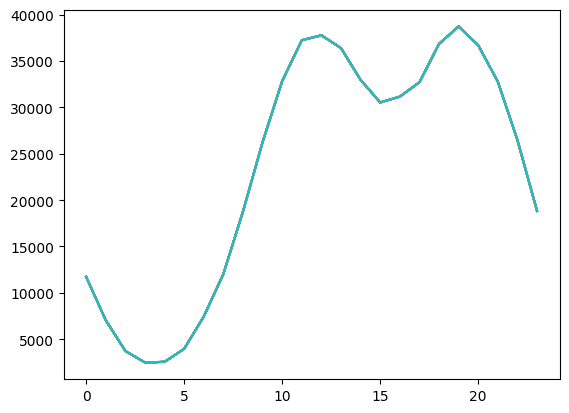

In [134]:
hours = [hour for hour, df in all_data.groupby('Hour')] # gives us the hours *** in the same order as tresults*** important for accurate bar graph

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.show

Text(0.5, 1.0, 'Sales by Hour')

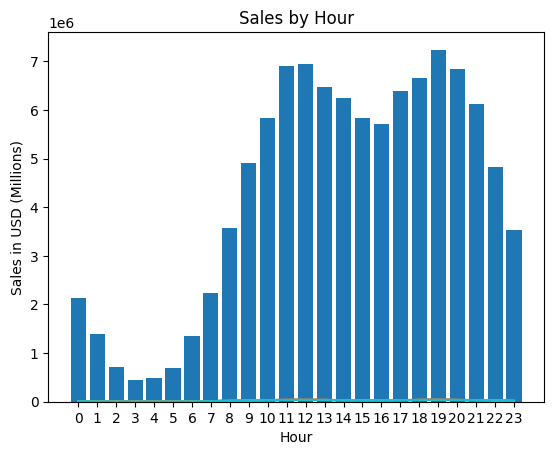

In [133]:
hours = [hour for hour, df in all_data.groupby('Hour')] # gives us the hours *** in the same order as tresults*** important for accurate bar graph

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.show

plt.bar(hours, tresults['Sales'])
plt.xticks(hours) #shows every month on the graph
plt.ylabel('Sales in USD (Millions)') #adds y label
plt.xlabel('Hour') # ads x label
plt.title('Sales by Hour') # adds title



Question 4: What products are most often sold together?

In [135]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38
...,...,...,...,...,...,...,...,...,...,...,...
560545,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20,56
560546,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16,0
560547,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7,39
560548,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17,30


In [144]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # new data frame with only order ID with multiple items
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # groups the products column based on Order ID. This then the transform/join joins the products together
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
1,295666,"LG Washing Machine,LG Washing Machine,LG Washi..."
2,295667,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
3,295668,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,295669,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...
402415,259353,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
402416,259354,"iPhone,iPhone,iPhone"
402417,259355,"iPhone,iPhone,iPhone"
402418,259356,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [146]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))


count.most_common(10)

[(('USB-C Charging Cable', 'USB-C Charging Cable'), 66141),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 65460),
 (('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)'), 62355),
 (('AA Batteries (4-pack)', 'AA Batteries (4-pack)'), 62046),
 (('Wired Headphones', 'Wired Headphones'), 56961),
 (('Apple Airpods Headphones', 'Apple Airpods Headphones'), 46863),
 (('Bose SoundSport Headphones', 'Bose SoundSport Headphones'), 40218),
 (('27in FHD Monitor', '27in FHD Monitor'), 22602),
 (('iPhone', 'iPhone'), 20544),
 (('27in 4K Gaming Monitor', '27in 4K Gaming Monitor'), 18735)]

What product sold the most and why?

In [147]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [162]:
product_group = all_data.groupby('Product')
presults = product_group.sum()['Quantity Ordered']

<ipython-input-162-529a780164c1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  presults = product_group.sum()['Quantity Ordered']


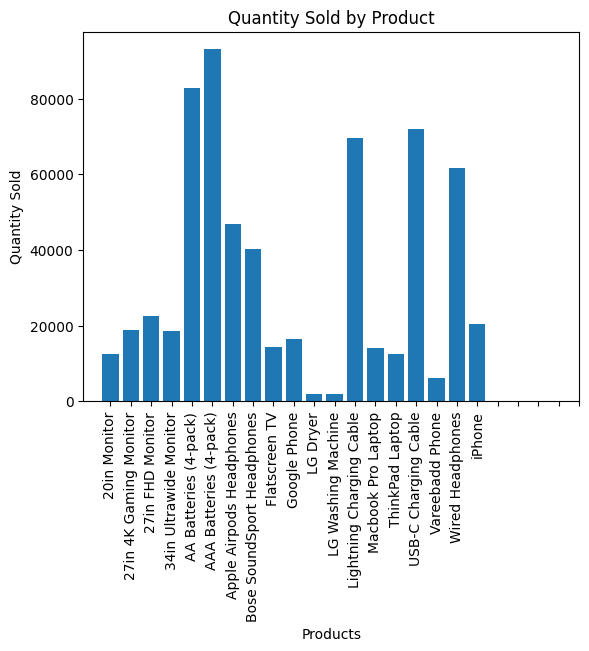

In [165]:
product = [products for products, df in product_group] # gives us the hours *** in the same order as tresults*** important for accurate bar graph


plt.bar(product, presults)
plt.xticks(hours, rotation = 'vertical') #shows every month on the graph
plt.ylabel('Quantity Sold') #adds y label
plt.xlabel('Products') # ads x label
plt.title('Quantity Sold by Product') # adds title

hours = [hour for hour, df in all_data.groupby('Hour')] # gives us the hours *** in the same order as tresults*** important for accurate bar graph



Everything runs on batteries/chargers and those items are cheaper relative to the rest on the list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')